In [ ]:
# Central Question: How does diabetes and other medical indicators impact patient length of stay within hospitals?

In [3]:
import pandas as pd

In [26]:
 import matplotlib.pyplot as plt


In [27]:
import numpy

In [37]:
import seaborn as sns


In [38]:
df=pd.read_csv("diabetic_data.csv")

In [39]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [40]:
df.shape

(101766, 50)

In [41]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [42]:
df['weight']=df['weight'].astype(str)

In [43]:
df2 = df[['gender','patient_nbr','race','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','diabetesMed']]
#this was in order to get a subset of just the values that i need to be looking at. i chose patient_nbr to identify indiual patients 


In [44]:
df2.head() #preview of new dataframe


,gender,patient_nbr,race,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed
0,Female,8222157,Caucasian,No,No,No,No,No,No,No,No
1,Female,55629189,Caucasian,No,Up,No,No,No,No,No,Yes
2,Female,86047875,AfricanAmerican,No,No,No,No,No,No,No,Yes
3,Male,82442376,Caucasian,No,Up,No,No,No,No,No,Yes
4,Male,42519267,Caucasian,No,Steady,No,No,No,No,No,Yes


In [45]:
# Count the number of medicines each patient takes
df['num_medicines'] = df[['citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                           'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']].apply(lambda row: row.eq('Yes').sum(), axis=1)



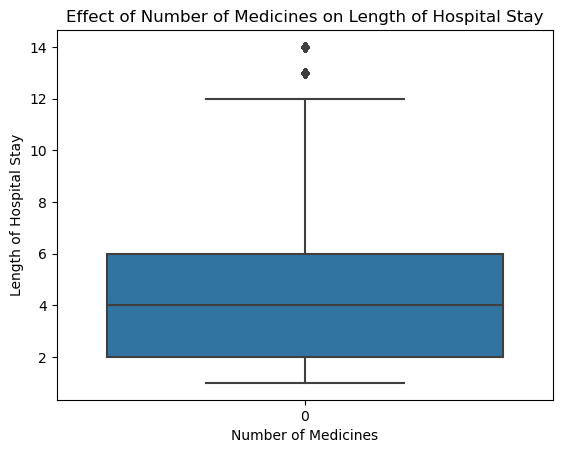

In [51]:
# Analyze the effect on length of hospital stay
sns.boxplot(x='num_medicines', y='time_in_hospital', data=df)
plt.title('Effect of Number of Medicines on Length of Hospital Stay')
plt.xlabel('Number of Medicines')
plt.ylabel('Length of Hospital Stay')
plt.show()

in this box and whisker plot it shows that the most of the patients hos a length pf stay between 2 and 6 days with significant outliers between 13 and 14 days. This shows that the majority of people on medication have a relatively short and comfortable stay in the hospital. the medianof this plt is 4 days 

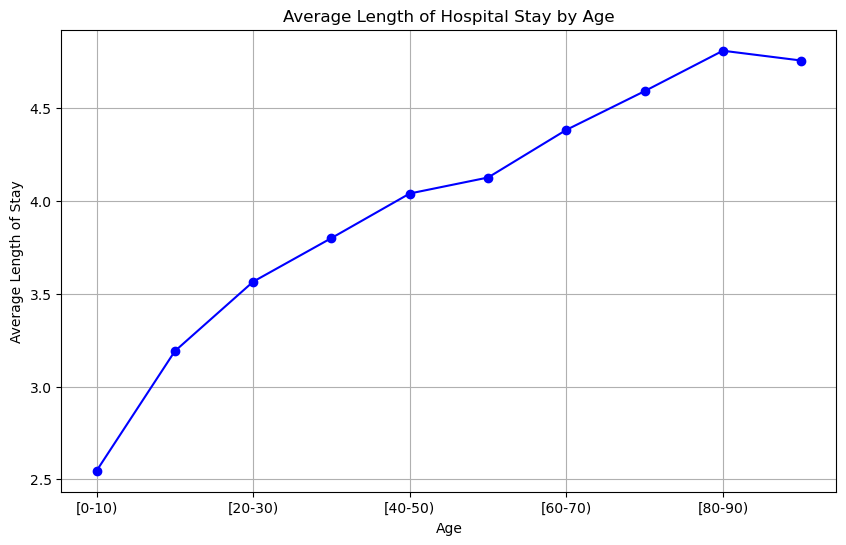

In [53]:
#i also want to figure out if the older a person is the longer their stay will be by using a line graph 
# Assuming you have a column named 'age' and 'length_of_stay'
# Create a line plot to show the relationship between age and length of stay
plt.figure(figsize=(10, 6))
df.groupby('age')['time_in_hospital'].mean().plot(marker='o', linestyle='-', color='b')
plt.title('Average Length of Hospital Stay by Age')
plt.xlabel('Age')
plt.ylabel('Average Length of Stay')
plt.grid(True)
plt.show()



With This graph it shows that indeed  the older a patient is the longer a patient would have to stay in the hospital this is most likely due to the facvt tha the younger someone is the healthier they would be in theory even with diabetes complications. also the elderly often have many underlying chronic conditions that  they deal with every day that could also contribute to their length of stay in the hospital. additionally it would useful to have concrete age values instead of age ranges that are shown in the data 

How does diabetes and other medical indicators impact patient length of stay
within hospitals?

To answer the Question The data and graph shown above show that diabetes complications as well as the medications they thake to mitage these symptoms as well as the age of the patient because the older someone is the more suceptable  to chronic disease that might br exasperated by the diabetes complications. because of these factors their stay in the hospital becomes greater and greater because treatment can be more complicated